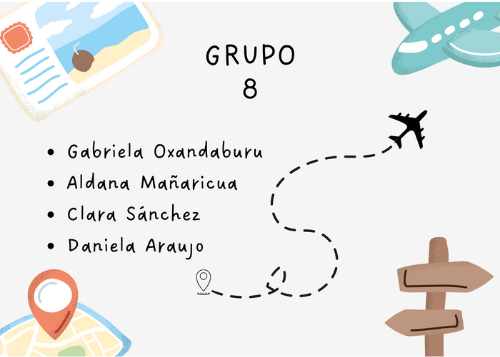

# ÁNALISIS EXPLORATORIO (EDA)


### Objetivo

Analizar las preferencias de los pasajeros de Aerolíneas British Airlines

### Dataset

Airline Customer Holiday Booking Dataset, datos correspondientes a la Aerolineas British Airways
Obtenido de Kaggle 

### Exploración de los datos

***1-  Importamos la las librerias que vamos a utilizar***

In [10]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

***2- Leemos el archivo csv***

In [13]:
PasajerosAerolineas= pd.read_csv('Passanger_booking_data.csv')

***3- Analizamos la forma y features del DataFrame***

In [15]:
PasajerosAerolineas.shape

(50002, 14)

***4 - Visualizamos las primeras 5 filas***

In [17]:
PasajerosAerolineas.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


***5- Renombramos las  columnas***

In [19]:

PasajerosAerolineas = PasajerosAerolineas.rename(columns=
                           {'num_passengers':'NumeroDePasajeros',
                            'sales_channel' : 'CanalDeVenta',
                            'trip_type'     : 'TipoDeViaje',
                            'purchase_lead' : 'ClientePotencial',
                            'length_of_stay': 'Estadia',
                            'flight_hour'   : 'HorarioDelVuelo',
                            'flight_day'    : 'DiaDelVuelo',
                            'route'         : 'Ruta',
                            'booking_origin': 'OrigenReserva',
                            'wants_extra_baggage' : 'EquipajeExtra',
                            'wants_preferred_seat': 'AsientosPreferido',
                            'wants_in_flight_meals': 'QuiereComidaEnVuelo',
                            'flight_duration'      : 'DuracionDelVuelo',
                            'booking_complete'     : 'ReservaCompleta'
                            })

Verificamos nombre de las columnas

In [21]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

***6- Analizamos el tipo de datos en el dataset***

In [23]:
PasajerosAerolineas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NumeroDePasajeros    50002 non-null  int64  
 1   CanalDeVenta         50002 non-null  object 
 2   TipoDeViaje          50002 non-null  object 
 3   ClientePotencial     50002 non-null  int64  
 4   Estadia              50002 non-null  int64  
 5   HorarioDelVuelo      50002 non-null  int64  
 6   DiaDelVuelo          50002 non-null  object 
 7   Ruta                 50002 non-null  object 
 8   OrigenReserva        50002 non-null  object 
 9   EquipajeExtra        50002 non-null  int64  
 10  AsientosPreferido    50002 non-null  int64  
 11  QuiereComidaEnVuelo  50002 non-null  int64  
 12  DuracionDelVuelo     50002 non-null  float64
 13  ReservaCompleta      50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ MB


***7- Revisamos si existen datos nulos***

In [25]:
valores_faltantes=PasajerosAerolineas.isnull().sum()
print(valores_faltantes)

NumeroDePasajeros      0
CanalDeVenta           0
TipoDeViaje            0
ClientePotencial       0
Estadia                0
HorarioDelVuelo        0
DiaDelVuelo            0
Ruta                   0
OrigenReserva          0
EquipajeExtra          0
AsientosPreferido      0
QuiereComidaEnVuelo    0
DuracionDelVuelo       0
ReservaCompleta        0
dtype: int64


Como se observa no se econtarron valores nulos

***8- Descripcion estadistica del Dataset***

In [28]:
PasajerosAerolineas.describe()

,NumeroDePasajeros,ClientePotencial,Estadia,HorarioDelVuelo,EquipajeExtra,AsientosPreferido,QuiereComidaEnVuelo,DuracionDelVuelo,ReservaCompleta
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


***9- Distribución de frecuencias por variables***

* Canal De Venta

In [31]:
(PasajerosAerolineas['CanalDeVenta'].value_counts())

Internet    44383
Mobile       5619
Name: CanalDeVenta, dtype: int64

* Tipo De Viaje

In [33]:
(PasajerosAerolineas['TipoDeViaje'].value_counts())


RoundTrip     49498
OneWay          387
CircleTrip      117
Name: TipoDeViaje, dtype: int64

* Dia Del Vuelo

In [35]:
(PasajerosAerolineas['DiaDelVuelo'].value_counts())

Mon    8102
Wed    7675
Tue    7674
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: DiaDelVuelo, dtype: int64

El dia mas elegido para volar es el dia lunes

* Porcentaje de Pasajes según Origen de la Reserva

In [38]:
PasajerosAerolineas["OrigenReserva"].value_counts()/PasajerosAerolineas.shape[0] * 100

Australia               35.744570
Malaysia                14.347426
South Korea              9.117635
Japan                    7.769689
China                    6.773729
                          ...    
Tanzania                 0.002000
Jordan                   0.002000
Lebanon                  0.002000
Bulgaria                 0.002000
Svalbard & Jan Mayen     0.002000
Name: OrigenReserva, Length: 104, dtype: float64

El 35.74 % de las reservas se realizan desde Asutralia

* Equipaje Extra

In [41]:
PasajerosAerolineas["EquipajeExtra"].value_counts()

1    33440
0    16562
Name: EquipajeExtra, dtype: int64

Mas de la mitad de los pasajeron eligen llevar equipaje extra

* Comida en Vuelo

In [44]:
PasajerosAerolineas["QuiereComidaEnVuelo"].value_counts()

0    28644
1    21358
Name: QuiereComidaEnVuelo, dtype: int64

La mayoria de los pasajero prefieron no comer durante el vuelo

* Duración del Vuelo

In [47]:
PasajerosAerolineas["DuracionDelVuelo"].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      668
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
7.21        1
Name: DuracionDelVuelo, dtype: int64

La duracion más frecuente es de 8 hs

* Horario

In [50]:
PasajerosAerolineas["HorarioDelVuelo"].value_counts()

8     3165
12    3163
9     3133
7     3126
11    3110
13    3101
10    3085
6     3051
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: HorarioDelVuelo, dtype: int64

Los 3 horarios de vuelo mas elegido son 8 AM, 12 AM y 9 AM

* Número de Pasajeros

In [53]:
PasajerosAerolineas["NumeroDePasajeros"].value_counts()

1    31353
2    12804
3     2942
4     1784
5      561
6      289
7      114
8       89
9       66
Name: NumeroDePasajeros, dtype: int64

Observamos que la mayoria de las reservas de vuelos son de 1 solo pasajero

* Tipo de Viaje

In [56]:
PasajerosAerolineas["TipoDeViaje"].value_counts()

RoundTrip     49498
OneWay          387
CircleTrip      117
Name: TipoDeViaje, dtype: int64

La preferencia de los clientes es reservar pasajes de "Ida y Vuelta" / "RoundTrip"

* Estadía

In [59]:
PasajerosAerolineas["Estadia"].value_counts()

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
379       1
226       1
415       1
778       1
12        1
Name: Estadia, Length: 336, dtype: int64

La estadia mas frecuente es de 6 dias de duración

### Limpieza de los datos

La limpieza de datos es un paso fundamental en el proceso de preparación de datos antes de realizar análisis o construir modelos de machine learning. La calidad de los datos afecta directamente la calidad de los resultados obtenidos.

Durante el análisis exploratorio de datos observamos que no hay datos nulos o faltantes.

El siguiente paso es la Transformación de Datos, ya que es necesario estandarizar las variables.

Se intentó inicialmente codificar las variables categóricas ('CanalDeVenta', 'TipoDeViaje','ruta' ,'DiaDelVuelo', 'OrigenReserva') utilizando pd.get_dummies() de Pandas y en segunda instancia one-hot encoding. Sin embargo, ambos causaron problemas al correr la notebook, provocando que el kernel de la notebook se reiniciara con el mensaje de error: "Kernel Restarting. The kernel for notebook.ipynb appears to have died. It will restart automatically." Esto puede deberse a que estos metodos crean nuevas columnas y al tener varias categorìas algunas de nuestras variables aumentó de forma considerable el tamaño del dataset.

Se resolvió esta situación cambiando la estrategia de codificación con LabelEncoding de la biblioteca scikit-learn. Este método permite convertir las categorías de una columna categórica en valores numéricos, asignando enteros a cada categoría. 



In [63]:
PasajerosAerolineas['CanalDeVenta']= PasajerosAerolineas['CanalDeVenta'].apply(lambda x: 0 if x == 'Mobile' else 1)

In [64]:
DiaDelVuelo = LabelEncoder()
PasajerosAerolineas['DiaDelVuelo'] = DiaDelVuelo.fit_transform(PasajerosAerolineas['DiaDelVuelo'])

In [65]:
TipoDeViaje = LabelEncoder()
PasajerosAerolineas['TipoDeViaje'] = TipoDeViaje.fit_transform(PasajerosAerolineas['TipoDeViaje'])

In [66]:
OrigenReserva = LabelEncoder()
PasajerosAerolineas['OrigenReserva'] = OrigenReserva.fit_transform(PasajerosAerolineas['OrigenReserva'])

In [67]:
PasajerosAerolineas['DuracionDelVuelo'] = PasajerosAerolineas['DuracionDelVuelo'].astype('int64')

In [68]:
Ruta = LabelEncoder()

In [69]:
PasajerosAerolineas['Ruta'] = Ruta.fit_transform(PasajerosAerolineas ['Ruta'])

* Verificamos el tipo de datos de las variables codificadas

In [71]:
PasajerosAerolineas.dtypes

NumeroDePasajeros      int64
CanalDeVenta           int64
TipoDeViaje            int64
ClientePotencial       int64
Estadia                int64
HorarioDelVuelo        int64
DiaDelVuelo            int64
Ruta                   int64
OrigenReserva          int64
EquipajeExtra          int64
AsientosPreferido      int64
QuiereComidaEnVuelo    int64
DuracionDelVuelo       int64
ReservaCompleta        int64
dtype: object

### Escalado de datos

El objetivo principal del escalado de datos es normalizar las variables. La estandarización es un proceso mediante el cual las características (variables) son transformadas de manera que tengan una media de 0 y una desviación estándar de 1 para que todas tengan la misma importancia durante el análisis o la construcción de modelos

Utilizamos Standard Scaler 

In [75]:
scaler = StandardScaler()
columnas_scale = ['NumeroDePasajeros', 'ClientePotencial', 'Estadia', 'HorarioDelVuelo', 'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo', 'DuracionDelVuelo', 'ReservaCompleta']

In [76]:
df_scaled = scaler.fit_transform(PasajerosAerolineas[columnas_scale])

In [77]:
PasajerosAerolineas_scaled = pd.DataFrame(df_scaled, columns=columnas_scale)

### Análisis de correlacion

El análisis de correlación es una técnica estadística que se utiliza para evaluar la fuerza y la dirección de la relación lineal entre dos variables. La correlación proporciona información sobre cómo cambia una variable en relación con otra.
Con el siguiente gráfico podemos observar de forma sintética la correlación entre variables de nuestro dataset.

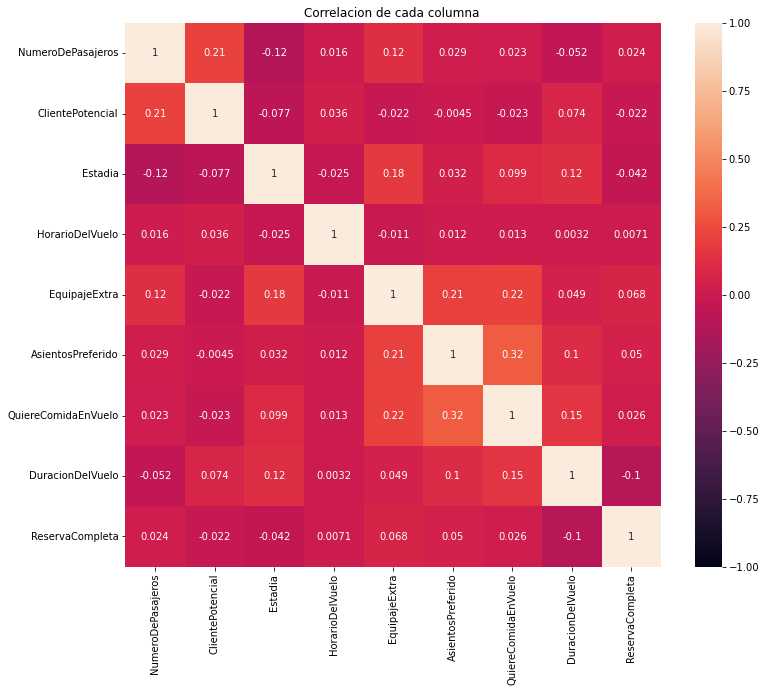

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(PasajerosAerolineas_scaled.corr(), annot=True, vmax=1, vmin=-1)
plt.title("Correlacion de cada columna ")
plt.show()


Dado los coeficientes de correlación observados podemos inferir que no hay correlaciones significativas entre las variables de nuestro Data Set, destacandose la correlacion entre asientos y comida en vuelo.

### Visualización de los datos

* Distribución de Frecuencias de las Variables 

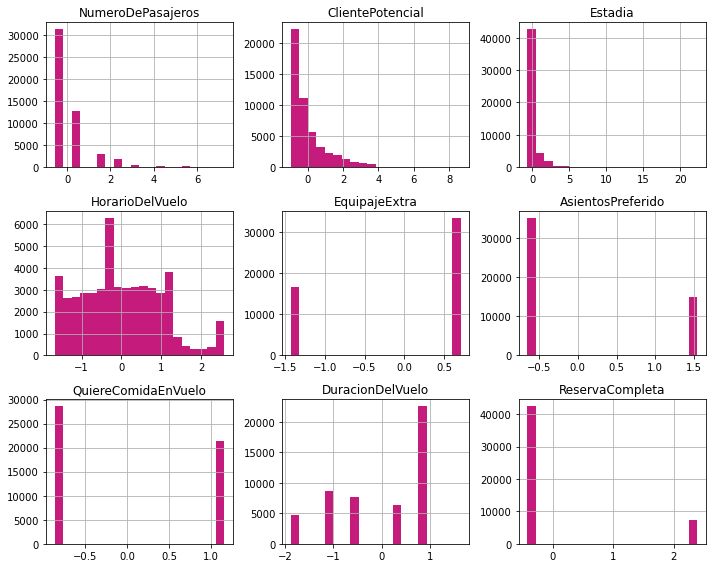

In [84]:
PasajerosAerolineas_scaled.hist(figsize=(10, 8), bins=20, color = "#c51b7d")
plt.tight_layout()
plt.show()

* Box Plot

El gráfico boxplot proporciona una descripción resumida de la distribución de los datos. 
Nos permite identificar patrones estadísticos, detectar ouliers y comparar distribuciones. 

<function matplotlib.pyplot.show(close=None, block=None)>

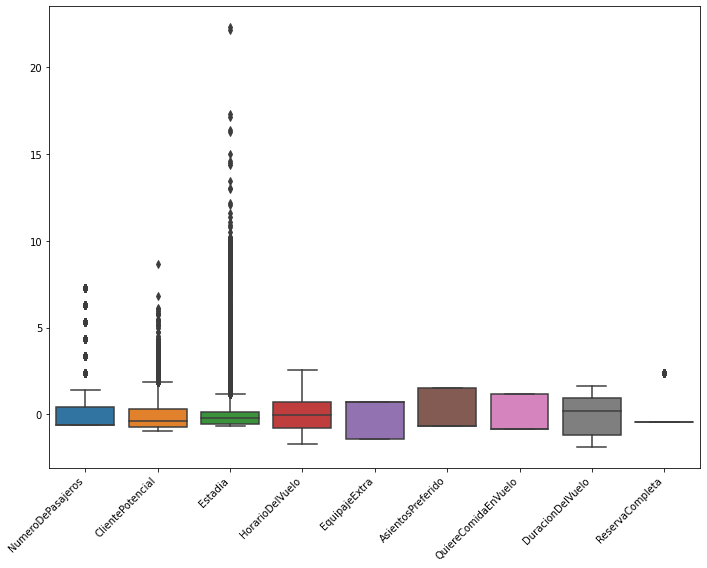

In [87]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=PasajerosAerolineas_scaled)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show

* Equipaje Extra

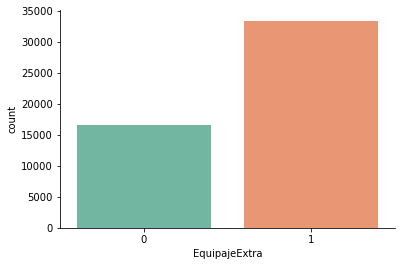

In [89]:
sns.countplot(x=PasajerosAerolineas['EquipajeExtra'], palette='Set2')
sns.despine()

Podemos observar que la mayoria elige la opcion de equipaje extra.

### Conclusión

El día mas elegido para volar es el dia lunes.

El 35.74 % de las reservas se realizan desde Australia.

Preferencia de los clientes es reservar pasajes de "Ida y Vuelta" / "RoundTrip".

Observamos que la mayoría de los vuelos son de 1 solo pasajero.

La estadía mas frecuente es de 6 días de duración.

Los horarios de vuelo mas elegido son 8 AM, 12 AM y 9 AM.

Mas de la mitad de los pasajeros eligen llevar equipaje extra.

La mayoría no elige el asiento.

La mayoría de los pasajeros prefiere no comer durante el vuelo.

El promedio de duración de los vuelos es de 8 hs.

La mayoría no realiza la reserva completa.

### Exportación del Dataset

In [94]:
PasajerosAerolineas_scaled.to_csv("PasajerosAerolineas_Limpio.csv", index=False)